In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
stop_search = pd.read_csv("D:/Stop_and_Search__Field_Interviews_.csv")

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
stop_search.head()

FieldInterviewID NOPD_Item      EventDate  District Zone OfficerAssignment  \
0             17415       NaN  1/1/2010 1:11         6    E     6th  District   
1             17416       NaN  1/1/2010 2:06         5    D     5th  District   
2             17416       NaN  1/1/2010 2:06         5    D     5th  District   
3             17416       NaN  1/1/2010 2:06         5    D     5th  District   
4             17416       NaN  1/1/2010 2:06         5    D     5th  District   

     StopDescription ActionsTaken  VehicleYear VehicleMake      ...       \
0  TRAFFIC VIOLATION          NaN       2005.0       DODGE      ...        
1   CALL FOR SERVICE          NaN          NaN         NaN      ...        
2   CALL FOR SERVICE          NaN          NaN         NaN      ...        
3   CALL FOR SERVICE          NaN          NaN         NaN      ...        
4   CALL FOR SERVICE          NaN          NaN         NaN      ...        

  SubjectWeight SubjectEyeColor SubjectHairColor  SubjectDriverLicState  \
0         160.0           Brown            Black                     LA   
1         140.0           Brown            Black                    NaN   
2         145.0           Brown            Black                    NaN   
3         140.0           Brown            Black                    NaN   
4         140.0           Brown            Black                    NaN   

  CreatedDateTime LastModifiedDateTime  Longitude Latitude  Zip  BlockAddress  
0   1/1/2010 1:26                  NaN        0.0      0.0  NaN           NaN  
1   1/1/2010 2:27                  NaN        0.0      0.0  NaN           NaN  
2   1/1/2010 2:27                  NaN        0.0      0.0  NaN           NaN  
3   1/1/2010 2:27                  NaN        0.0      0.0  NaN           NaN  
4   1/1/2010 2:27                  NaN        0.0      0.0  NaN           NaN  

[5 rows x 29 columns]

In [4]:
# check rows and columns
stop_search.shape

(430157, 29)

In [5]:
# check datatype for each feature
print(stop_search.select_dtypes(include = ['float64']).dtypes)
print(stop_search.select_dtypes(include = ['int64']).dtypes)
print(stop_search.select_dtypes(include = ['object']).dtypes)

VehicleYear      float64
SubjectID        float64
SubjectAge       float64
SubjectHeight    float64
SubjectWeight    float64
Longitude        float64
Latitude         float64
Zip              float64
dtype: object
FieldInterviewID    int64
District            int64
dtype: object
NOPD_Item                object
EventDate                object
Zone                     object
OfficerAssignment        object
StopDescription          object
ActionsTaken             object
VehicleMake              object
VehicleModel             object
VehicleStyle             object
VehicleColor             object
SubjectRace              object
SubjectGender            object
SubjectHasPhotoID        object
SubjectEyeColor          object
SubjectHairColor         object
SubjectDriverLicState    object
CreatedDateTime          object
LastModifiedDateTime     object
BlockAddress             object
dtype: object


In [6]:
# check missing values for each feature
print("Total number of missing values are", stop_search.isnull().sum().sum())
miss_df = pd.DataFrame({'Column': stop_search.isnull().sum().index, 
                        'Num of Missing': stop_search.isnull().sum()}, index = None)
miss_df.set_index('Column', inplace = True)
miss_df = miss_df.rename_axis(None)
miss_df.sort_values(by = ['Num of Missing'], ascending = [False])

Total number of missing values are 2266160


Num of Missing
LastModifiedDateTime           339539
ActionsTaken                   277245
VehicleModel                   224862
VehicleStyle                   215180
VehicleYear                    214003
VehicleColor                   213187
VehicleMake                    210589
SubjectDriverLicState          181838
Zip                            109363
BlockAddress                    96464
NOPD_Item                       93550
SubjectAge                      11277
SubjectHairColor                11277
SubjectEyeColor                 11277
SubjectWeight                   11277
SubjectHeight                   11277
SubjectRace                     11277
SubjectGender                   11277
SubjectID                       11277
OfficerAssignment                 124
SubjectHasPhotoID                   0
StopDescription                     0
Zone                                0
CreatedDateTime                     0
District                            0
Longitude                           0
Latitude                            0
EventDate                           0
FieldInterviewID                    0

### Analysis purposes

#### 1. Summarize the variables related to stop and search
 (1) Demographics;
 (2) Vehicle information; 
 (3) Locations; 
 (4) Time; 
 (5) Stop type; 
 (6) Stop result.
#### 2. Define the subject pictures
 (1) Who has the high / lower probabilities of being stopped
#### 3. Compare patterns of stop and search among districts and years
#### 4. Individual level prediction analysis
 (1) Make a good and accurate stop and search based on prediction; 
 (2) Explore factors impacting a good stop and search.

### 1. Summarize the variables related to stop and search
(1) Demographics - 
 SubjectRace,
 SubjectGender,
 SubjectAge,
 SubjectHeight,
 SubjectWeight,
 SubjectEyeColor,
 SubjectHairColor.

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


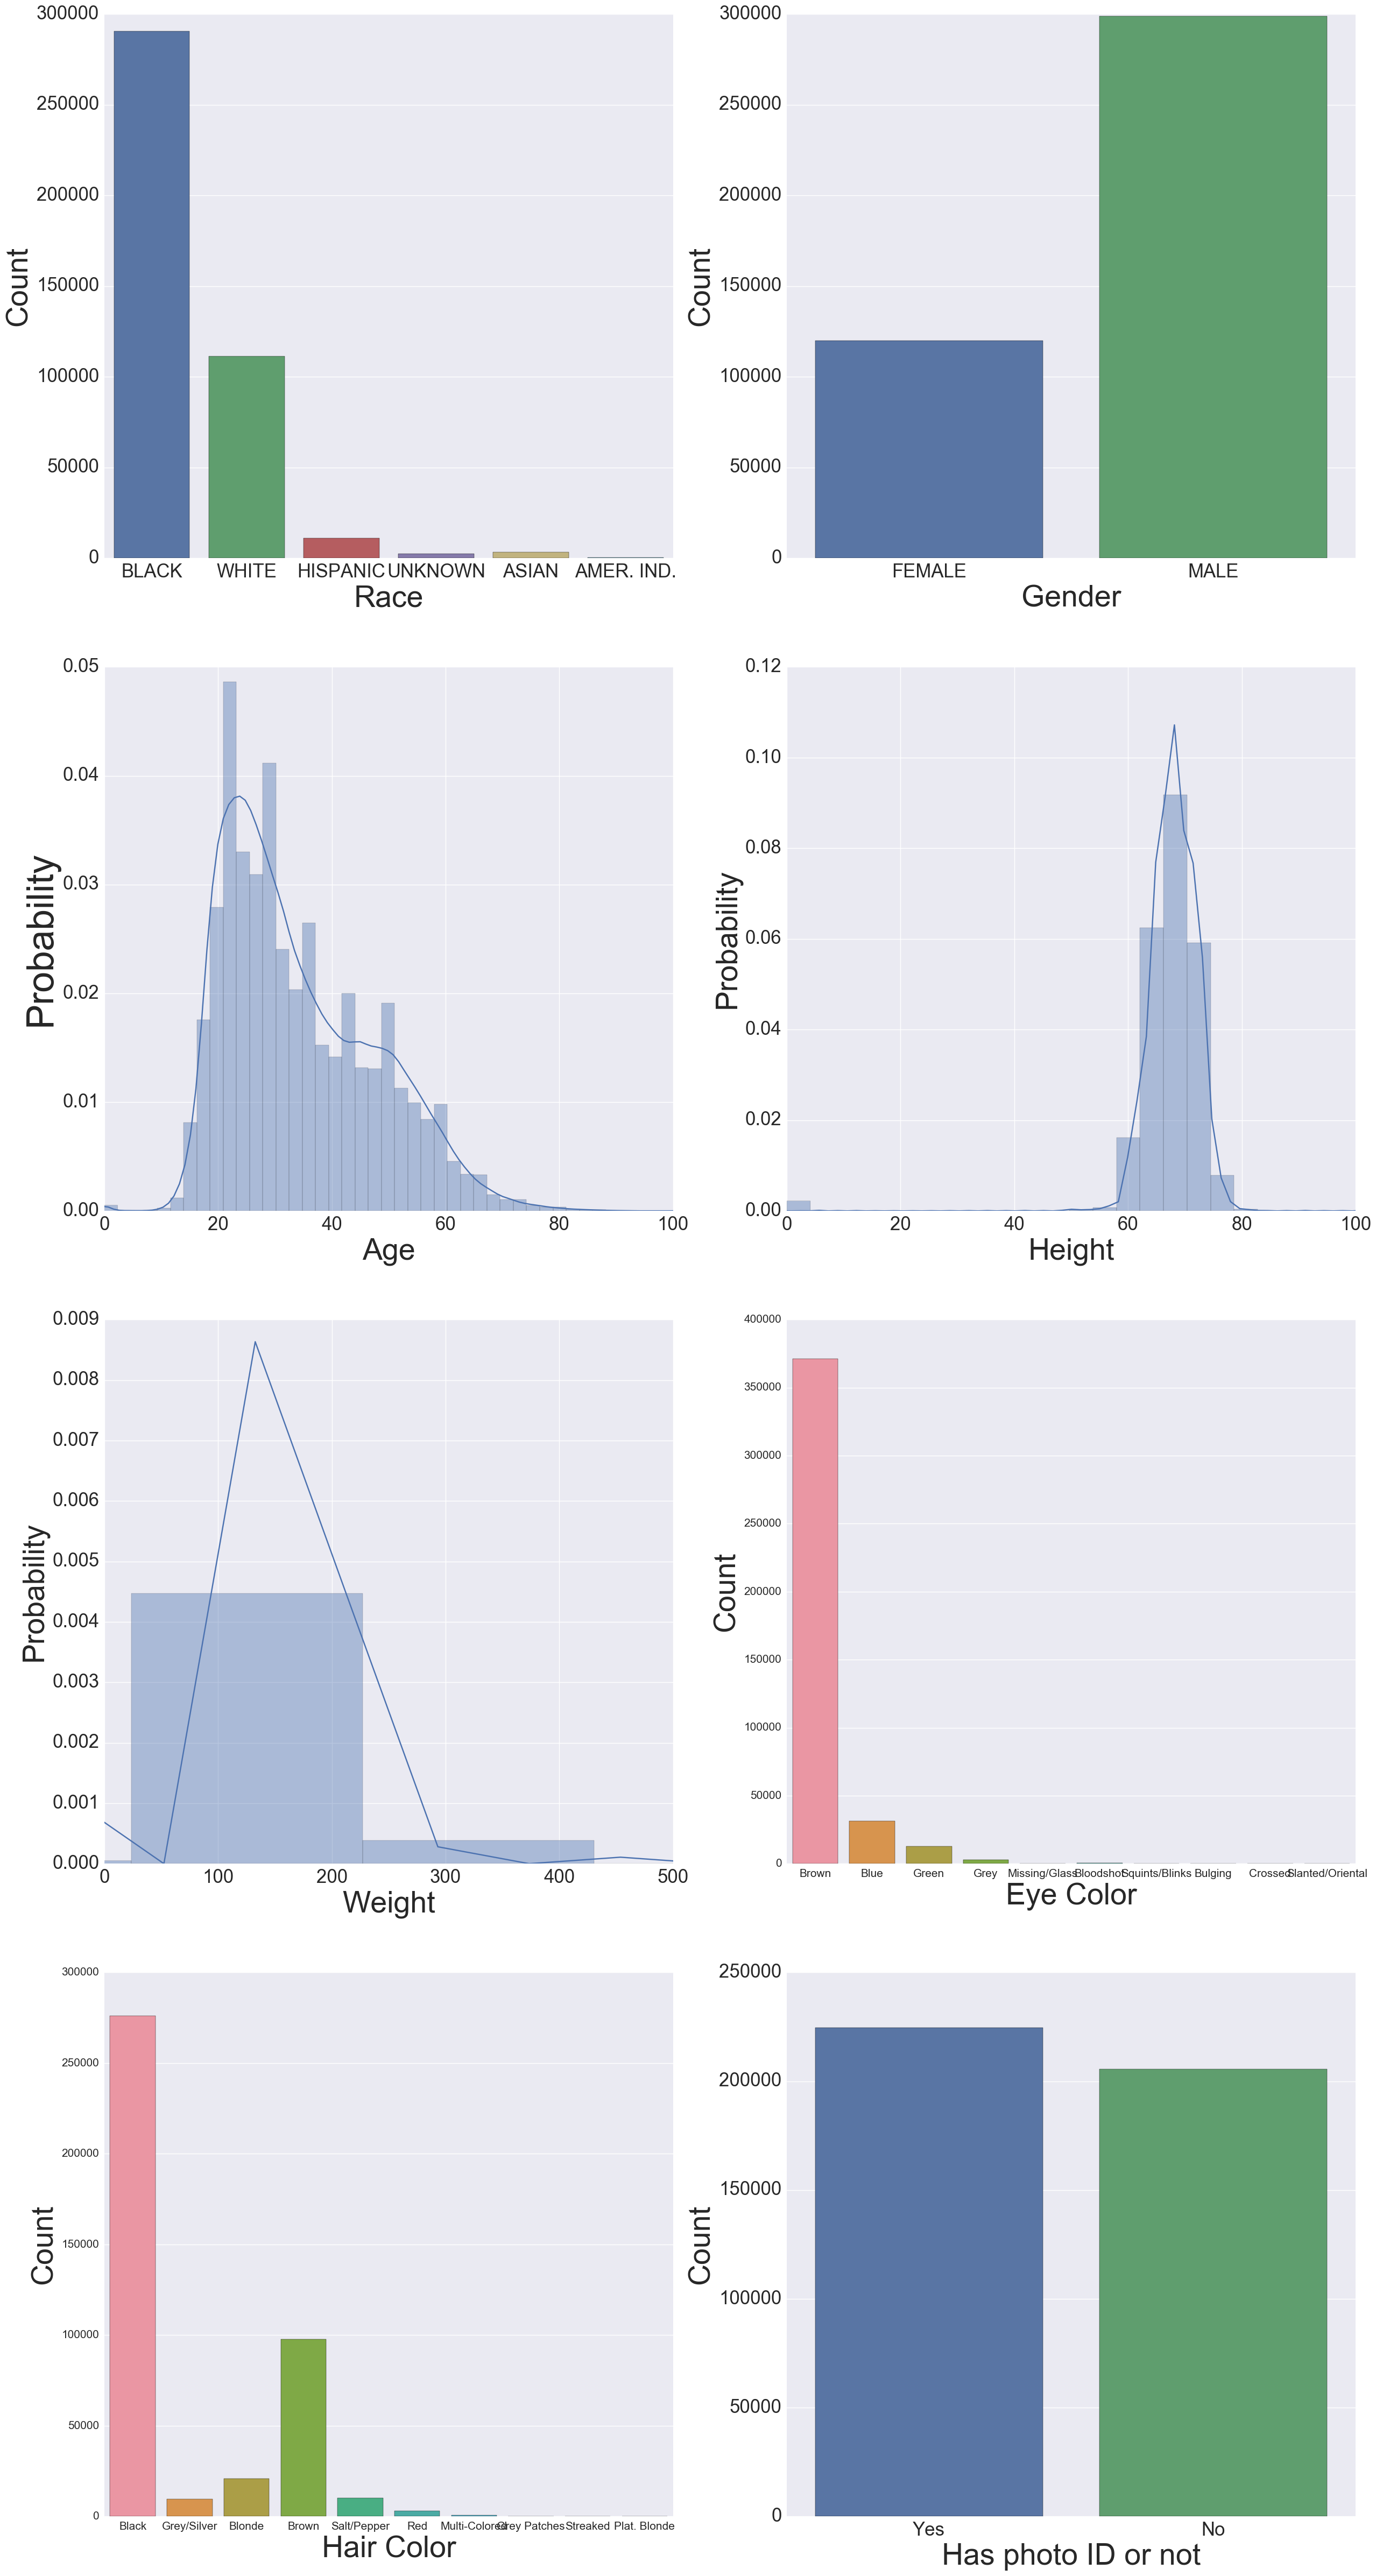

In [7]:
fig = plt.figure(dpi = 100, figsize = (30, 60))

ax1 = fig.add_subplot(4, 2, 1)
ax1.plot = sns.countplot(stop_search["SubjectRace"])
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("Race", fontsize = 40)
plt.ylabel("Count", fontsize = 40)

ax2 = fig.add_subplot(4, 2, 2)
ax2.plot = sns.countplot(stop_search["SubjectGender"])
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("Gender", fontsize = 40)
plt.ylabel("Count", fontsize = 40)

ax3 = fig.add_subplot(4, 2, 3)
ax3.plot = sns.distplot(stop_search["SubjectAge"][~ np.isnan(stop_search["SubjectAge"])], bins = 50)
sns.plt.xlim(0, 100)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("Age", fontsize = 40)
plt.ylabel("Probability", fontsize = 50)

ax4 = fig.add_subplot(4, 2, 4)
ax4.plot = sns.distplot(stop_search["SubjectHeight"][~ np.isnan(stop_search["SubjectHeight"])], bins = 50)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
sns.plt.xlim(0, 100)
plt.xlabel("Height", fontsize = 40)
plt.ylabel("Probability", fontsize = 40)

ax5 = fig.add_subplot(4, 2, 5)
ax5.plot = sns.distplot(stop_search["SubjectWeight"][~ np.isnan(stop_search["SubjectWeight"])], bins = 50)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
sns.plt.xlim(0, 500)
plt.xlabel("Weight", fontsize = 40)
plt.ylabel("Probability", fontsize = 40)

ax7 = fig.add_subplot(4, 2, 6)
ax7.plot = sns.countplot(stop_search["SubjectEyeColor"])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Eye Color", fontsize = 40)
plt.ylabel("Count", fontsize = 40)

ax8 = fig.add_subplot(4, 2, 7)
ax8.plot = sns.countplot(stop_search["SubjectHairColor"])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Hair Color", fontsize = 40)
plt.ylabel("Count", fontsize = 40)

ax8 = fig.add_subplot(4, 2, 8)
ax8.plot = sns.countplot(stop_search["SubjectHasPhotoID"])
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("Has photo ID or not", fontsize = 40)
plt.ylabel("Count", fontsize = 40)

fig.show()

(2) Vehicle information - 
VehicleModel, 
VehicleStyle, 
VehicleYear, 
VehicleColor, 
VehicleMake, 
SubjectDriverLicState.

In [8]:
# get frequency for uniques of each feature
print(stop_search["VehicleYear"].value_counts())
print(stop_search["VehicleModel"].value_counts())
print(stop_search["VehicleStyle"].value_counts())
print(stop_search["VehicleColor"].value_counts())
print(stop_search["VehicleMake"].value_counts())
print(stop_search["SubjectDriverLicState"].value_counts())

2006.0    16822
2005.0    15347
2004.0    14839
2002.0    14489
2003.0    14474
2001.0    13489
2000.0    13252
2007.0    13217
2008.0    11483
1999.0    10940
1998.0     7885
2010.0     7350
2011.0     6838
2009.0     6789
1997.0     6390
2012.0     6272
2013.0     5505
1996.0     4842
2014.0     4756
1995.0     4117
2015.0     3683
1994.0     2882
1993.0     1963
2016.0     1448
1992.0     1386
1900.0     1270
1991.0      981
1990.0      706
1989.0      524
1988.0      393
          ...  
1982.0       78
1979.0       75
1981.0       74
1978.0       47
1980.0       41
1975.0       35
1977.0       23
1976.0       18
1966.0       17
1971.0       13
1970.0       13
1972.0       12
1973.0       10
2018.0        9
1974.0        9
1967.0        8
1965.0        8
1969.0        6
1963.0        3
1957.0        3
1955.0        2
1901.0        2
2019.0        1
1968.0        1
1964.0        1
1959.0        1
1947.0        1
1937.0        1
1934.0        1
1902.0        1
Name: VehicleYear, dtype

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


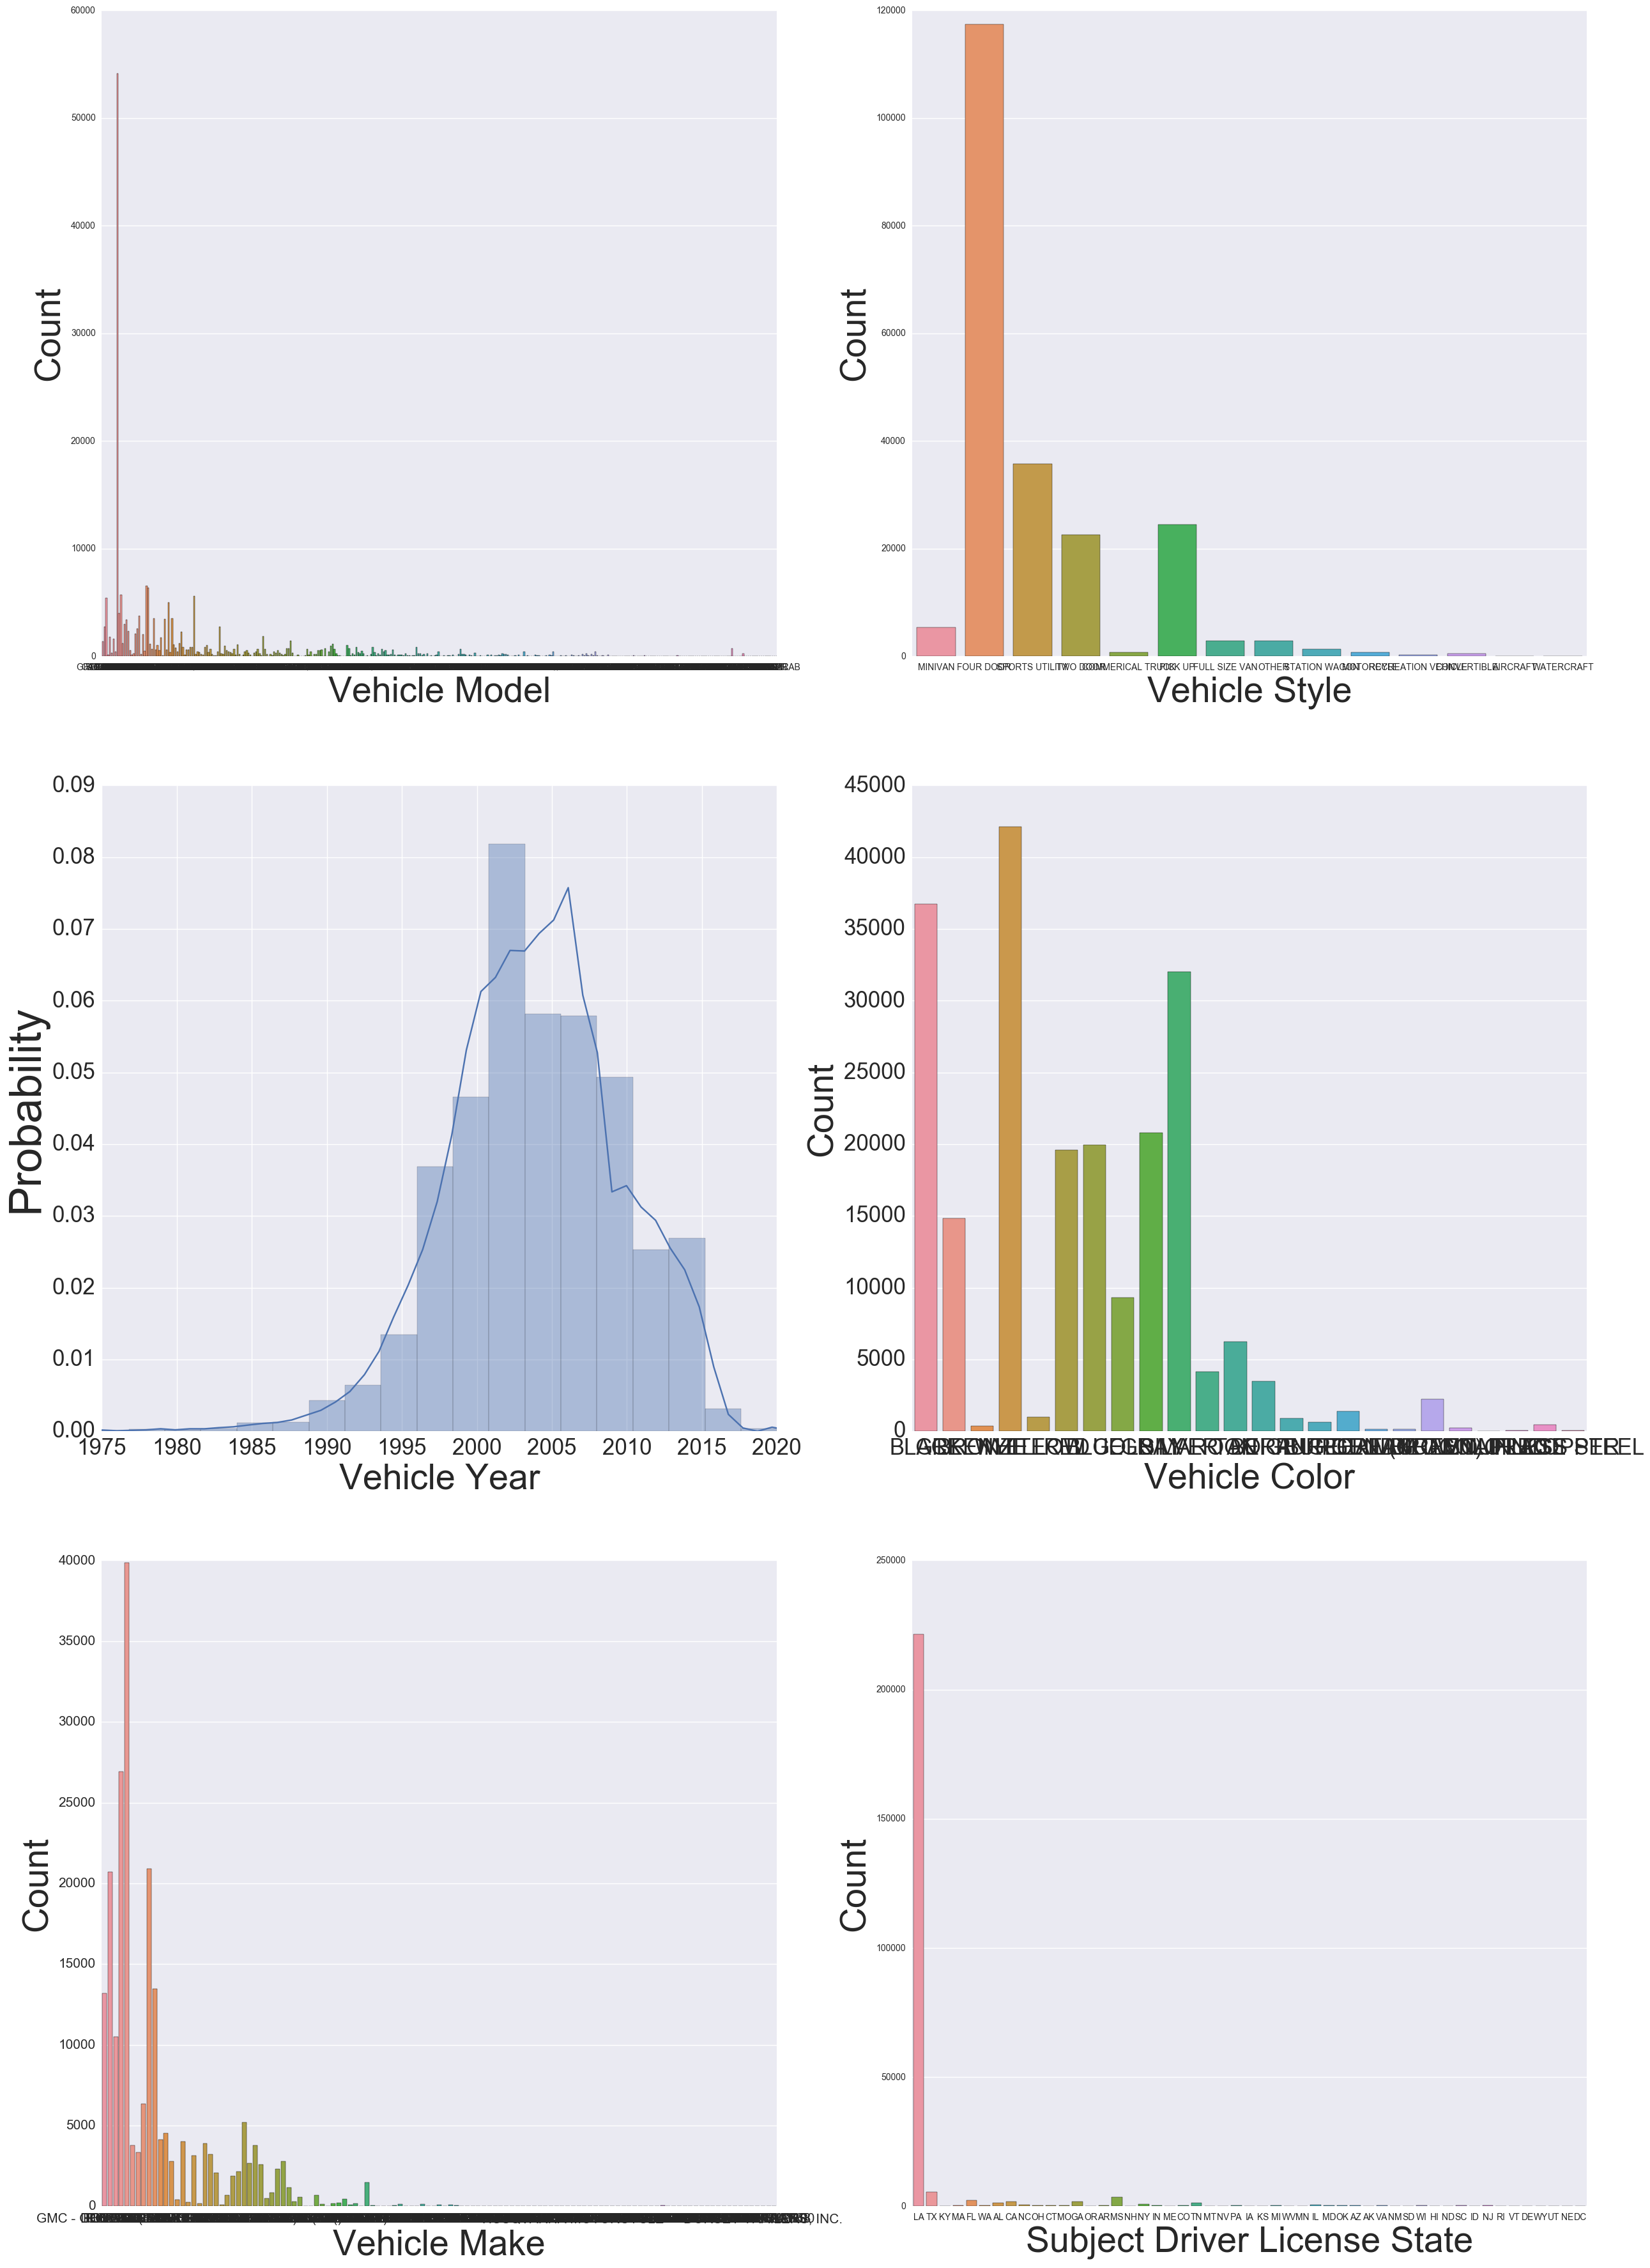

In [9]:
fig = plt.figure(dpi = 100, figsize = (30, 60))

ax1 = fig.add_subplot(4, 2, 1)
ax1.plot = sns.countplot(stop_search["VehicleModel"])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Vehicle Model", fontsize = 40)
plt.ylabel("Count", fontsize = 40)

ax2 = fig.add_subplot(4, 2, 2)
ax2.plot = sns.countplot(stop_search["VehicleStyle"])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Vehicle Style", fontsize = 40)
plt.ylabel("Count", fontsize = 40)

ax3 = fig.add_subplot(4, 2, 3)
ax3.plot = sns.distplot(stop_search["VehicleYear"][~ np.isnan(stop_search["VehicleYear"])], bins = 50)
sns.plt.xlim(1975, 2020)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("Vehicle Year", fontsize = 40)
plt.ylabel("Probability", fontsize = 50)

ax4 = fig.add_subplot(4, 2, 4)
ax4.plot = sns.countplot(stop_search["VehicleColor"])
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("Vehicle Color", fontsize = 40)
plt.ylabel("Count", fontsize = 40)

ax5 = fig.add_subplot(4, 2, 5)
ax5.plot = sns.countplot(stop_search["VehicleMake"])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Vehicle Make", fontsize = 40)
plt.ylabel("Count", fontsize = 40)

ax7 = fig.add_subplot(4, 2, 6)
ax7.plot = sns.countplot(stop_search["SubjectDriverLicState"])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Subject Driver License State", fontsize = 40)
plt.ylabel("Count", fontsize = 40)

fig.show()

(3) Locations - 
Zip, 
BlockAddress, 
OfficerAssignment, 
Zone, 
District, 
Longitude, 
Latitude

In [10]:
print(stop_search["Zip"].value_counts())
print(stop_search["BlockAddress"].value_counts())
print(stop_search["OfficerAssignment"].value_counts())
print(stop_search["Zone"].value_counts())
print(stop_search["District"].value_counts())

70130.0    32992
70119.0    31795
70117.0    30545
70126.0    27388
70116.0    26811
70112.0    23844
70125.0    20369
70114.0    20346
70122.0    19397
70118.0    15354
70115.0    15065
70113.0    14856
70127.0    13497
70124.0    11088
70131.0     7946
70128.0     6319
70129.0     3064
70148.0      118
Name: Zip, dtype: int64
Saint Charles Ave & Calliope St      1599
004XX Bourbon St                     1540
007XX Canal St                       1451
Chef Menteur Hwy & Downman Rd        1272
005XX Bourbon St                     1271
003XX Bourbon St                     1262
001XX Royal St                       1224
002XX Bourbon St                     1027
Calliope St & Saint Charles Ave       977
Franklin Ave & Saint Claude Ave       811
024XX Sanctuary Dr                    768
011XX Elysian Fields Ave              729
Chef Menteur Hwy & Desire Pkwy        682
006XX Bourbon St                      674
060XX Chef Menteur Hwy                672
001XX Bourbon St                      67

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


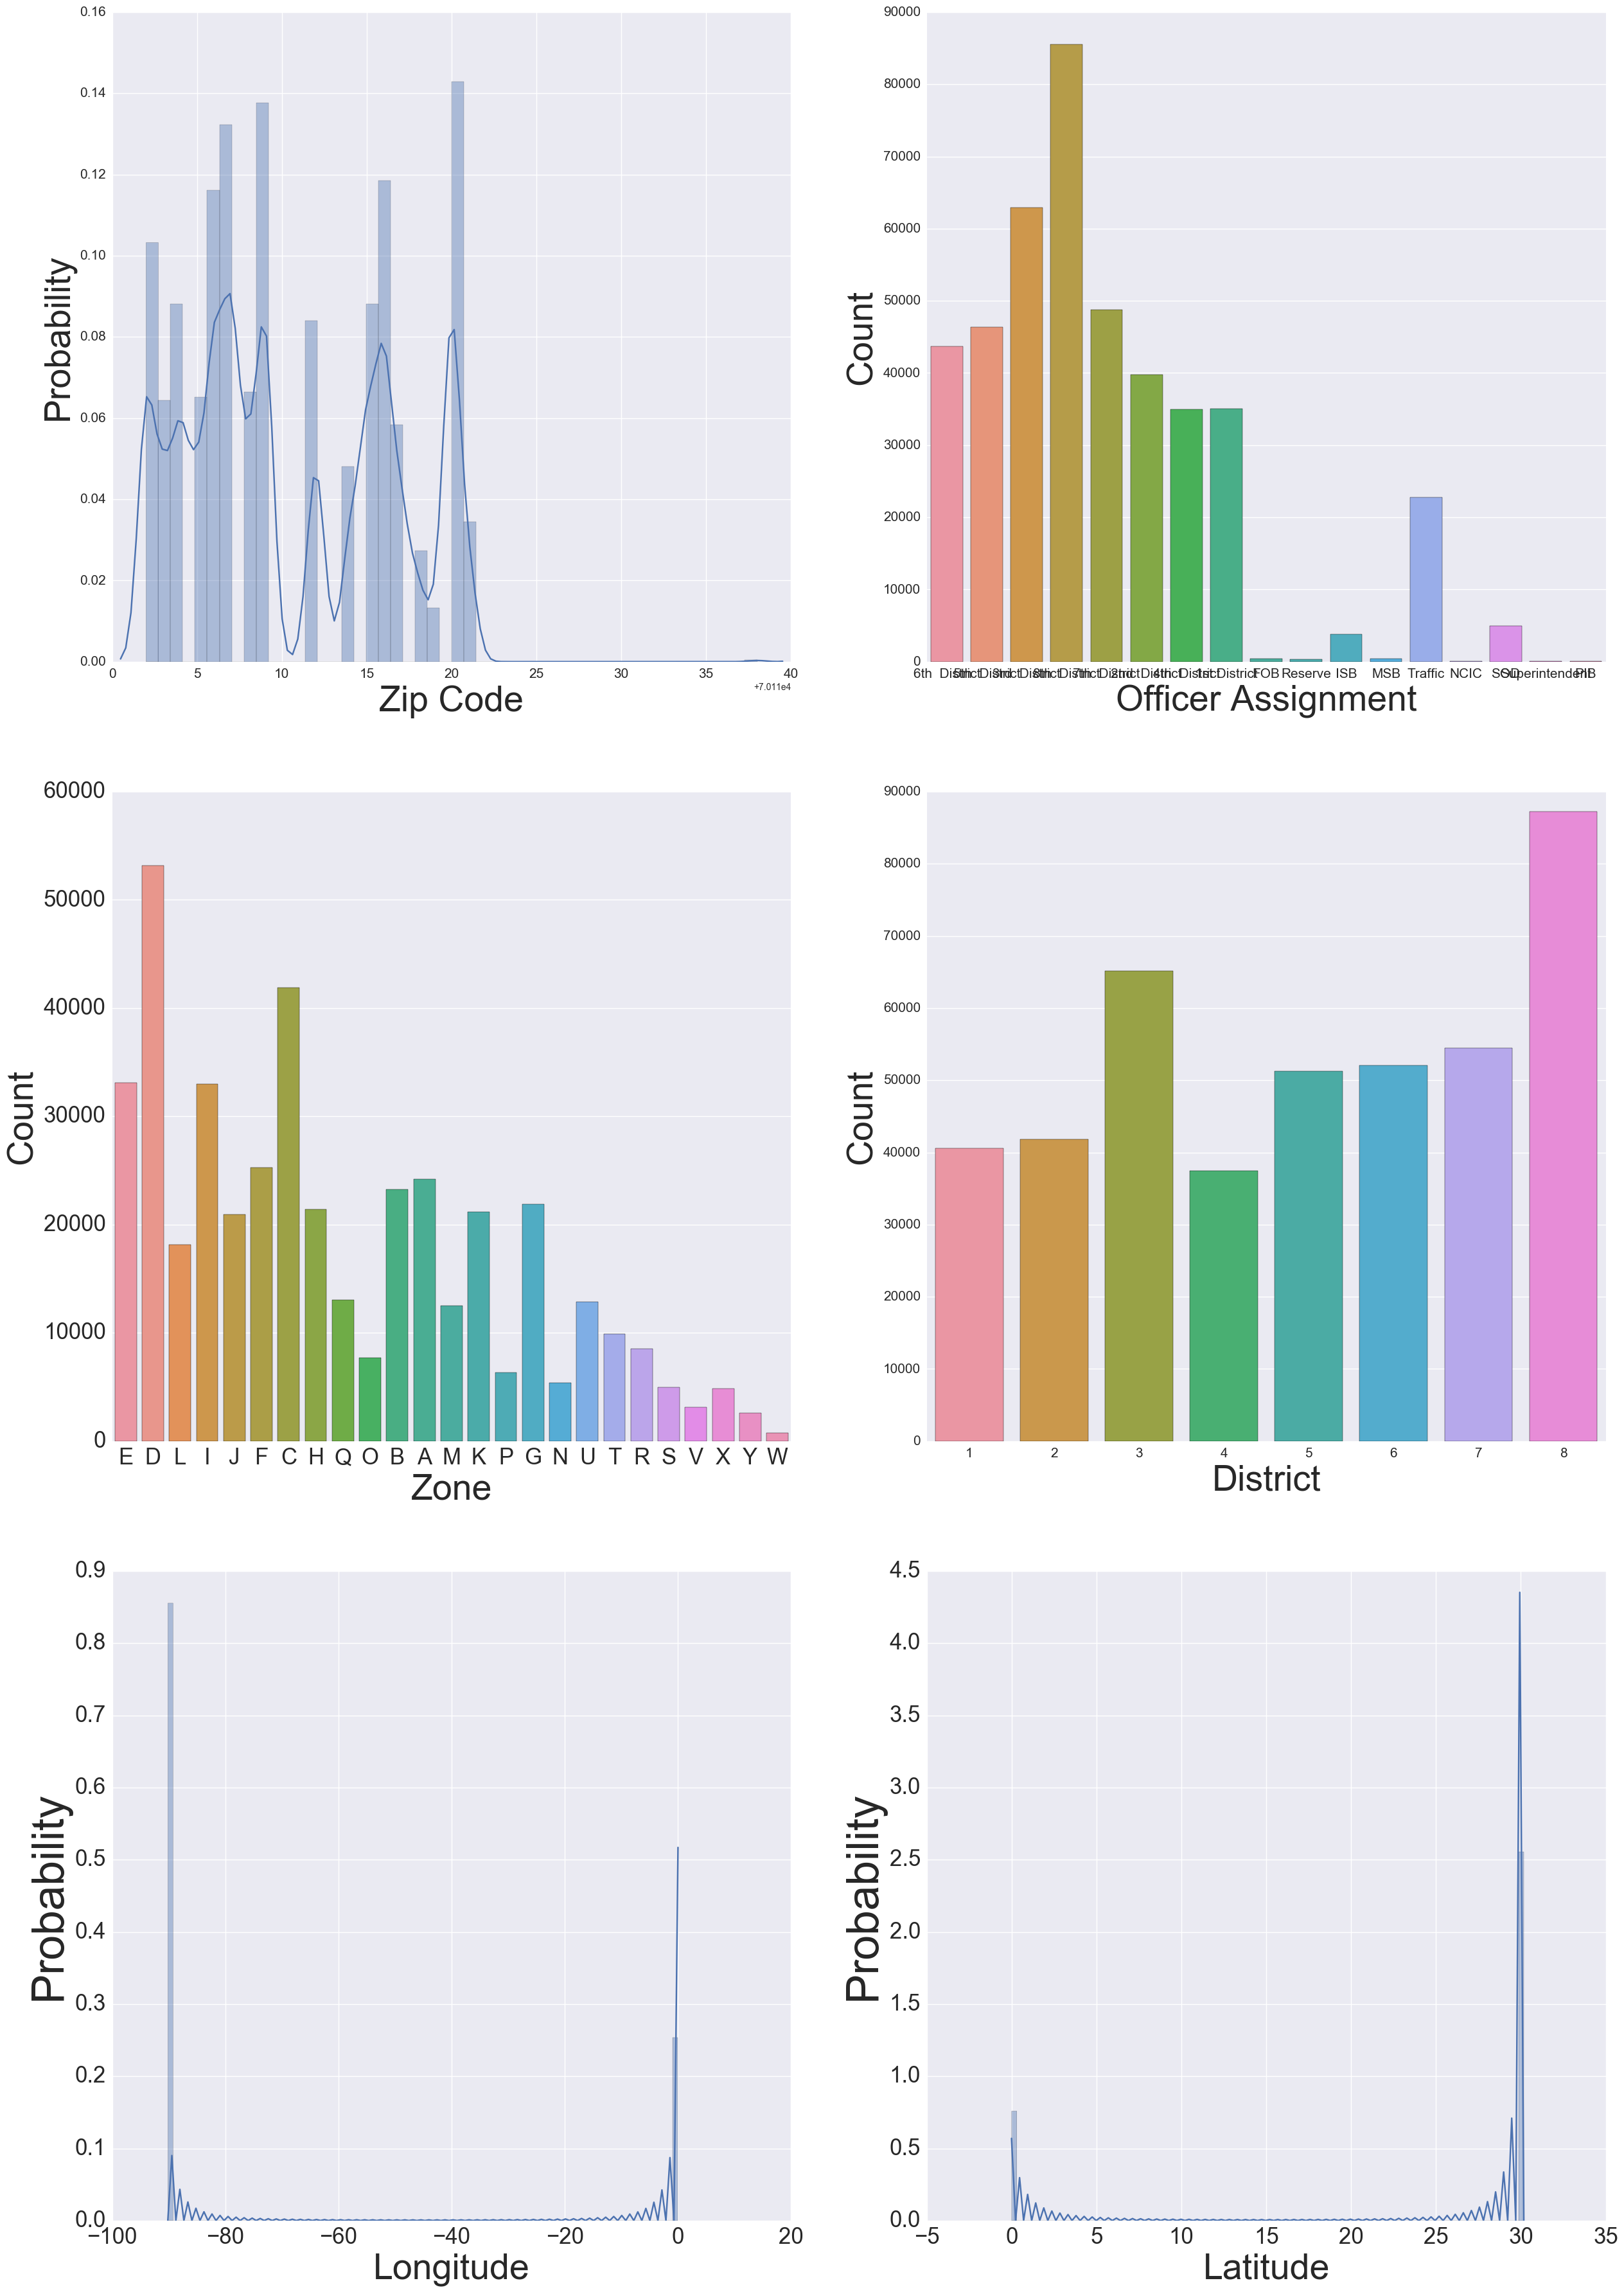

In [11]:
fig = plt.figure(dpi = 100, figsize = (30, 60))

ax1 = fig.add_subplot(4, 2, 1)
ax1.plot = sns.distplot(stop_search["Zip"][~ np.isnan(stop_search["Zip"])])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Zip Code", fontsize = 40)
plt.ylabel("Probability", fontsize = 40)

ax2 = fig.add_subplot(4, 2, 2)
ax2.plot = sns.countplot(stop_search["OfficerAssignment"])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Officer Assignment", fontsize = 40)
plt.ylabel("Count", fontsize = 40)

ax4 = fig.add_subplot(4, 2, 3)
ax4.plot = sns.countplot(stop_search["Zone"])
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("Zone", fontsize = 40)
plt.ylabel("Count", fontsize = 40)

ax5 = fig.add_subplot(4, 2, 4)
ax5.plot = sns.countplot(stop_search["District"])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("District", fontsize = 40)
plt.ylabel("Count", fontsize = 40)
                                     
ax3 = fig.add_subplot(4, 2, 5)
ax3.plot = sns.distplot(stop_search["Longitude"][~ np.isnan(stop_search["Longitude"])], bins = 100)
# sns.plt.xlim(1975, 2020)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("Longitude", fontsize = 40)
plt.ylabel("Probability", fontsize = 50)
                                    
ax3 = fig.add_subplot(4, 2, 6)
ax3.plot = sns.distplot(stop_search["Latitude"][~ np.isnan(stop_search["Latitude"])], bins = 100)
# sns.plt.xlim(1975, 2020)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("Latitude", fontsize = 40)
plt.ylabel("Probability", fontsize = 50)

fig.show()

(4) Time - 
LastModifiedDateTime, 
CreatedDateTime, 
EventDate

In [12]:
# LastModifiedDateTime
LastModifiedDateTime = pd.to_datetime(stop_search['LastModifiedDateTime'])
LastModifiedYear = LastModifiedDateTime.dt.year
LastModifiedMonth = LastModifiedDateTime.dt.month
LastModifiedDay = LastModifiedDateTime.dt.day
LastModifiedDayofYear = LastModifiedDateTime.dt.dayofyear
LastModifiedDayofWeek = LastModifiedDateTime.dt.dayofweek
LastModifiedWeekofYear = LastModifiedDateTime.dt.weekofyear
LastModifiedQuarter = LastModifiedDateTime.dt.quarter

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


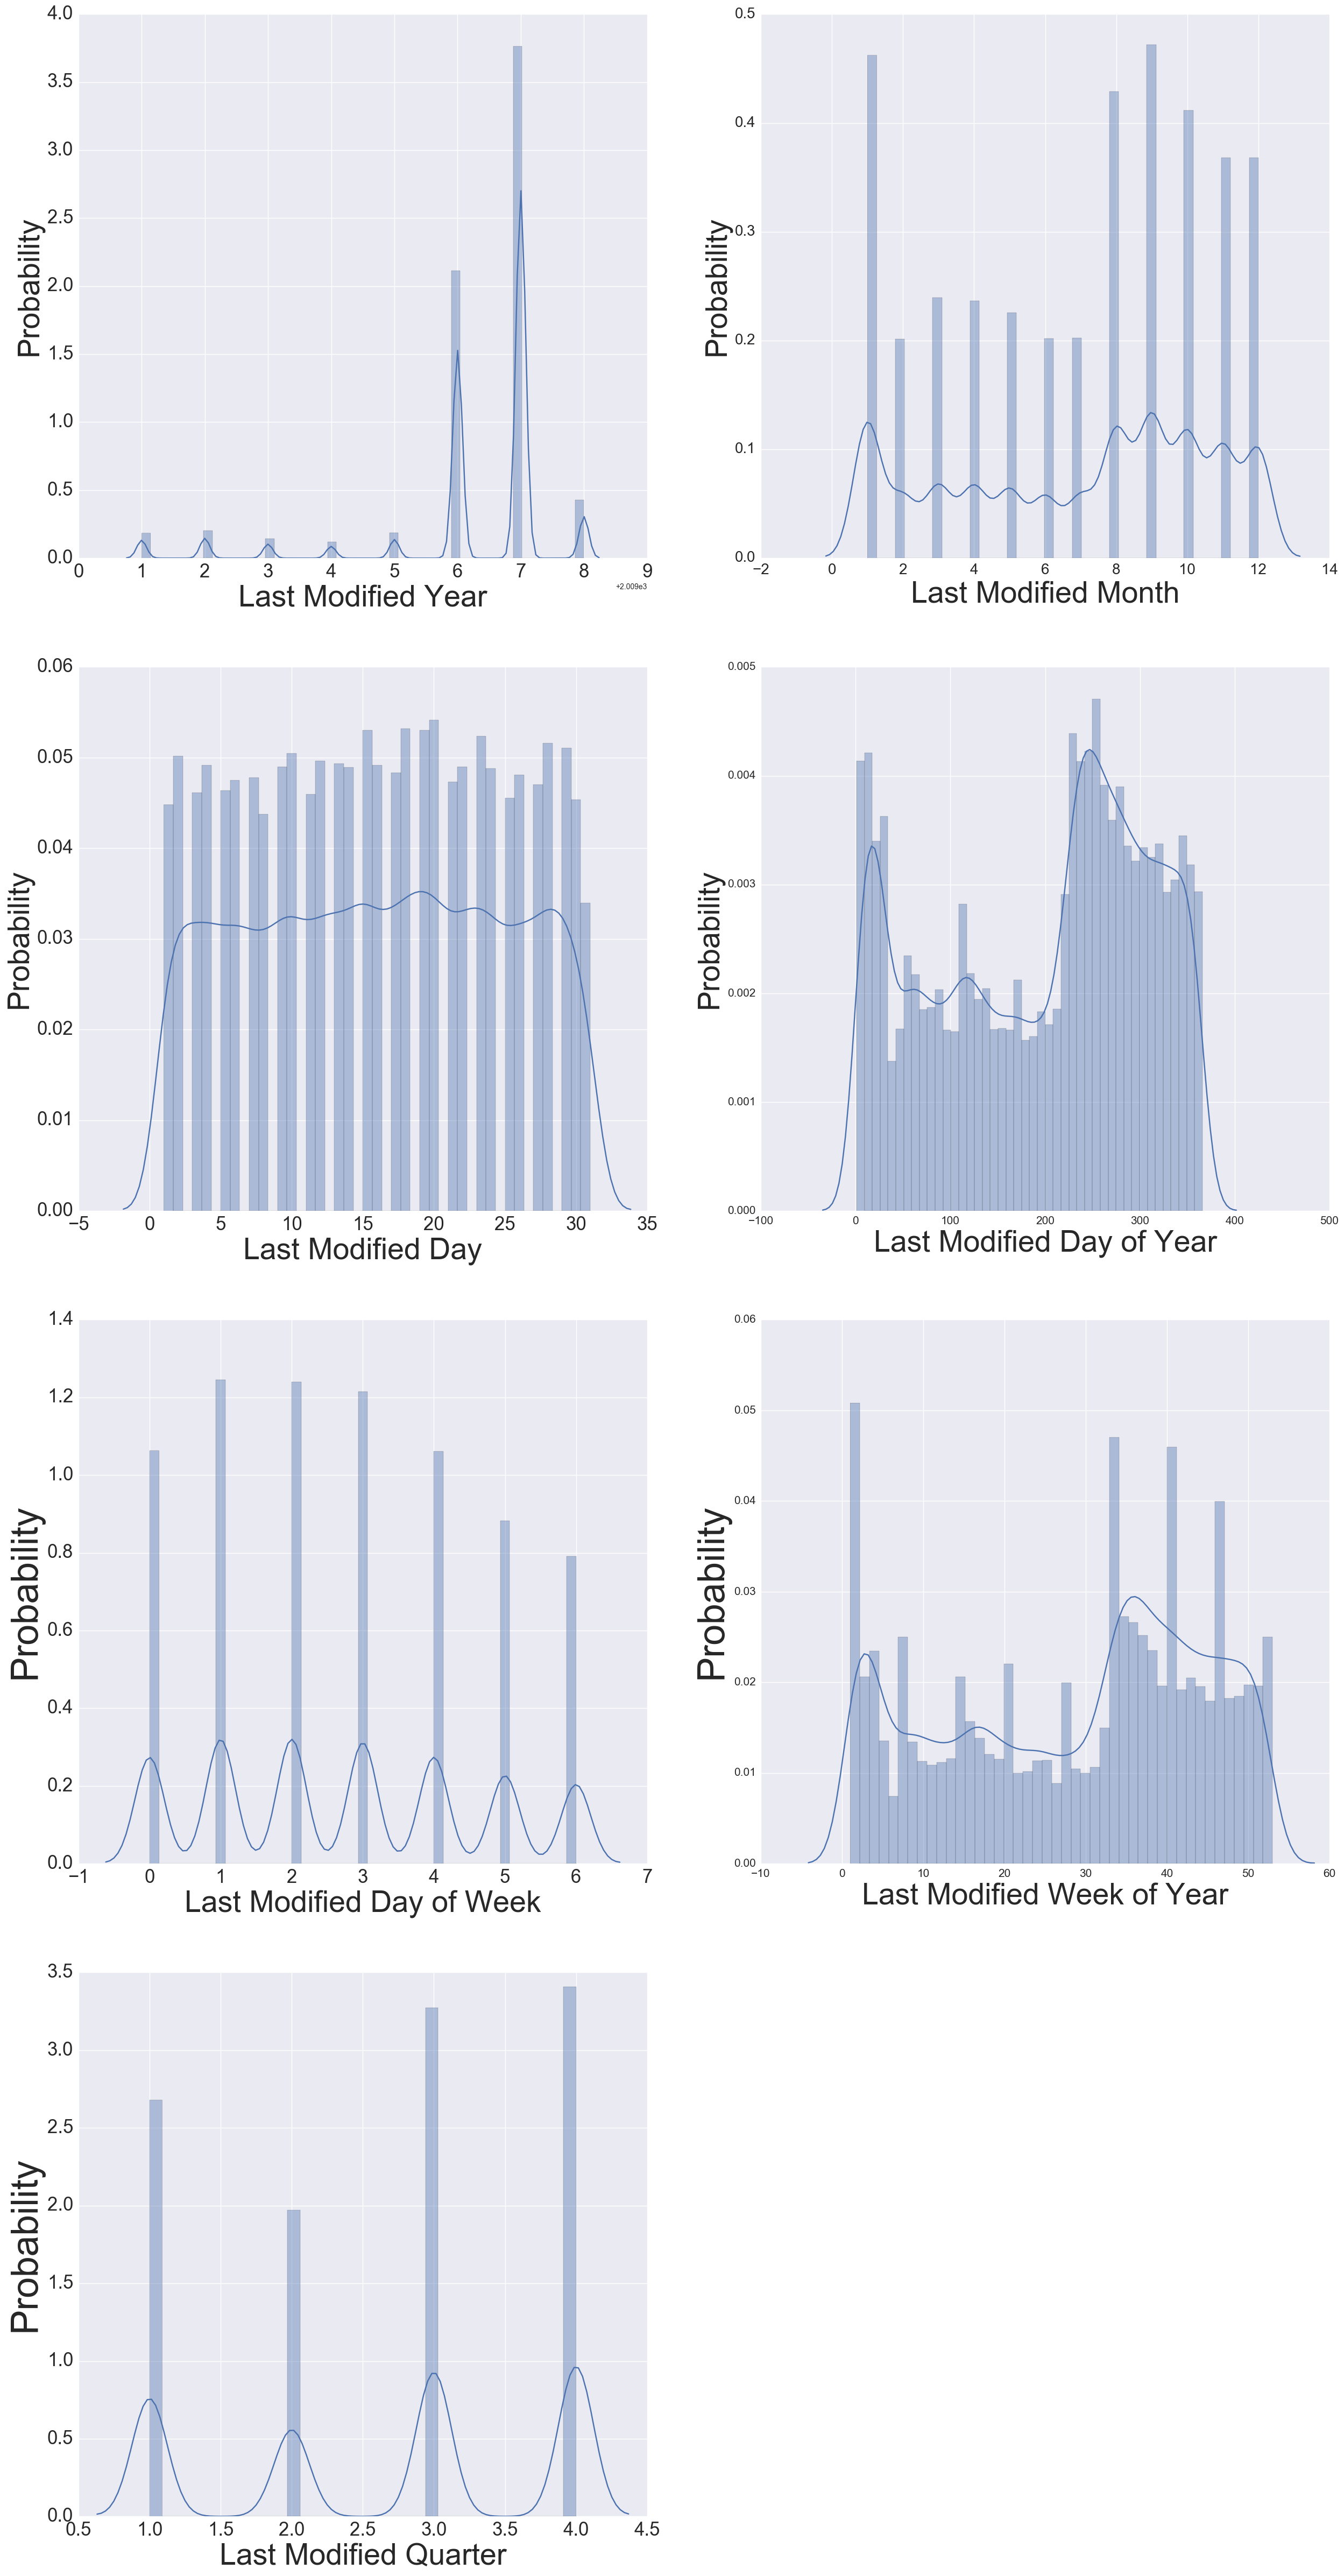

In [13]:
fig = plt.figure(dpi = 100, figsize = (30, 60))

ax1 = fig.add_subplot(4, 2, 1)
ax1.plot = sns.distplot(LastModifiedYear[~ np.isnan(LastModifiedYear)])
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("Last Modified Year", fontsize = 40)
plt.ylabel("Probability", fontsize = 40)

ax2 = fig.add_subplot(4, 2, 2)
ax2.plot = sns.distplot(LastModifiedMonth[~ np.isnan(LastModifiedMonth)])
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Last Modified Month", fontsize = 40)
plt.ylabel("Probability", fontsize = 40)

ax4 = fig.add_subplot(4, 2, 3)
ax4.plot = sns.distplot(LastModifiedDay[~ np.isnan(LastModifiedDay)])
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("Last Modified Day", fontsize = 40)
plt.ylabel("Probability", fontsize = 40)

ax5 = fig.add_subplot(4, 2, 4)
ax5.plot = sns.distplot(LastModifiedDayofYear[~ np.isnan(LastModifiedDayofYear)])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Last Modified Day of Year", fontsize = 40)
plt.ylabel("Probability", fontsize = 40)
                                     
ax3 = fig.add_subplot(4, 2, 5)
ax3.plot = sns.distplot(LastModifiedDayofWeek[~ np.isnan(LastModifiedDayofWeek)])
# sns.plt.xlim(1975, 2020)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("Last Modified Day of Week", fontsize = 40)
plt.ylabel("Probability", fontsize = 50)
                                    
ax3 = fig.add_subplot(4, 2, 6)
ax3.plot = sns.distplot(LastModifiedWeekofYear[~ np.isnan(LastModifiedWeekofYear)])
# sns.plt.xlim(1975, 2020)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Last Modified Week of Year", fontsize = 40)
plt.ylabel("Probability", fontsize = 50)

ax3 = fig.add_subplot(4, 2, 7)
ax3.plot = sns.distplot(LastModifiedQuarter[~ np.isnan(LastModifiedQuarter)])
# sns.plt.xlim(1975, 2020)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("Last Modified Quarter", fontsize = 40)
plt.ylabel("Probability", fontsize = 50)

fig.show()

In [14]:
# CreatedDateTime
CreatedDateTime = pd.to_datetime(stop_search['CreatedDateTime'])
CreatedYear = CreatedDateTime.dt.year
CreatedMonth = CreatedDateTime.dt.month
CreatedDay = CreatedDateTime.dt.day
CreatedDayofYear = CreatedDateTime.dt.dayofyear
CreatedDayofWeek = CreatedDateTime.dt.dayofweek
CreatedWeekofYear = CreatedDateTime.dt.weekofyear
CreatedQuarter = CreatedDateTime.dt.quarter

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


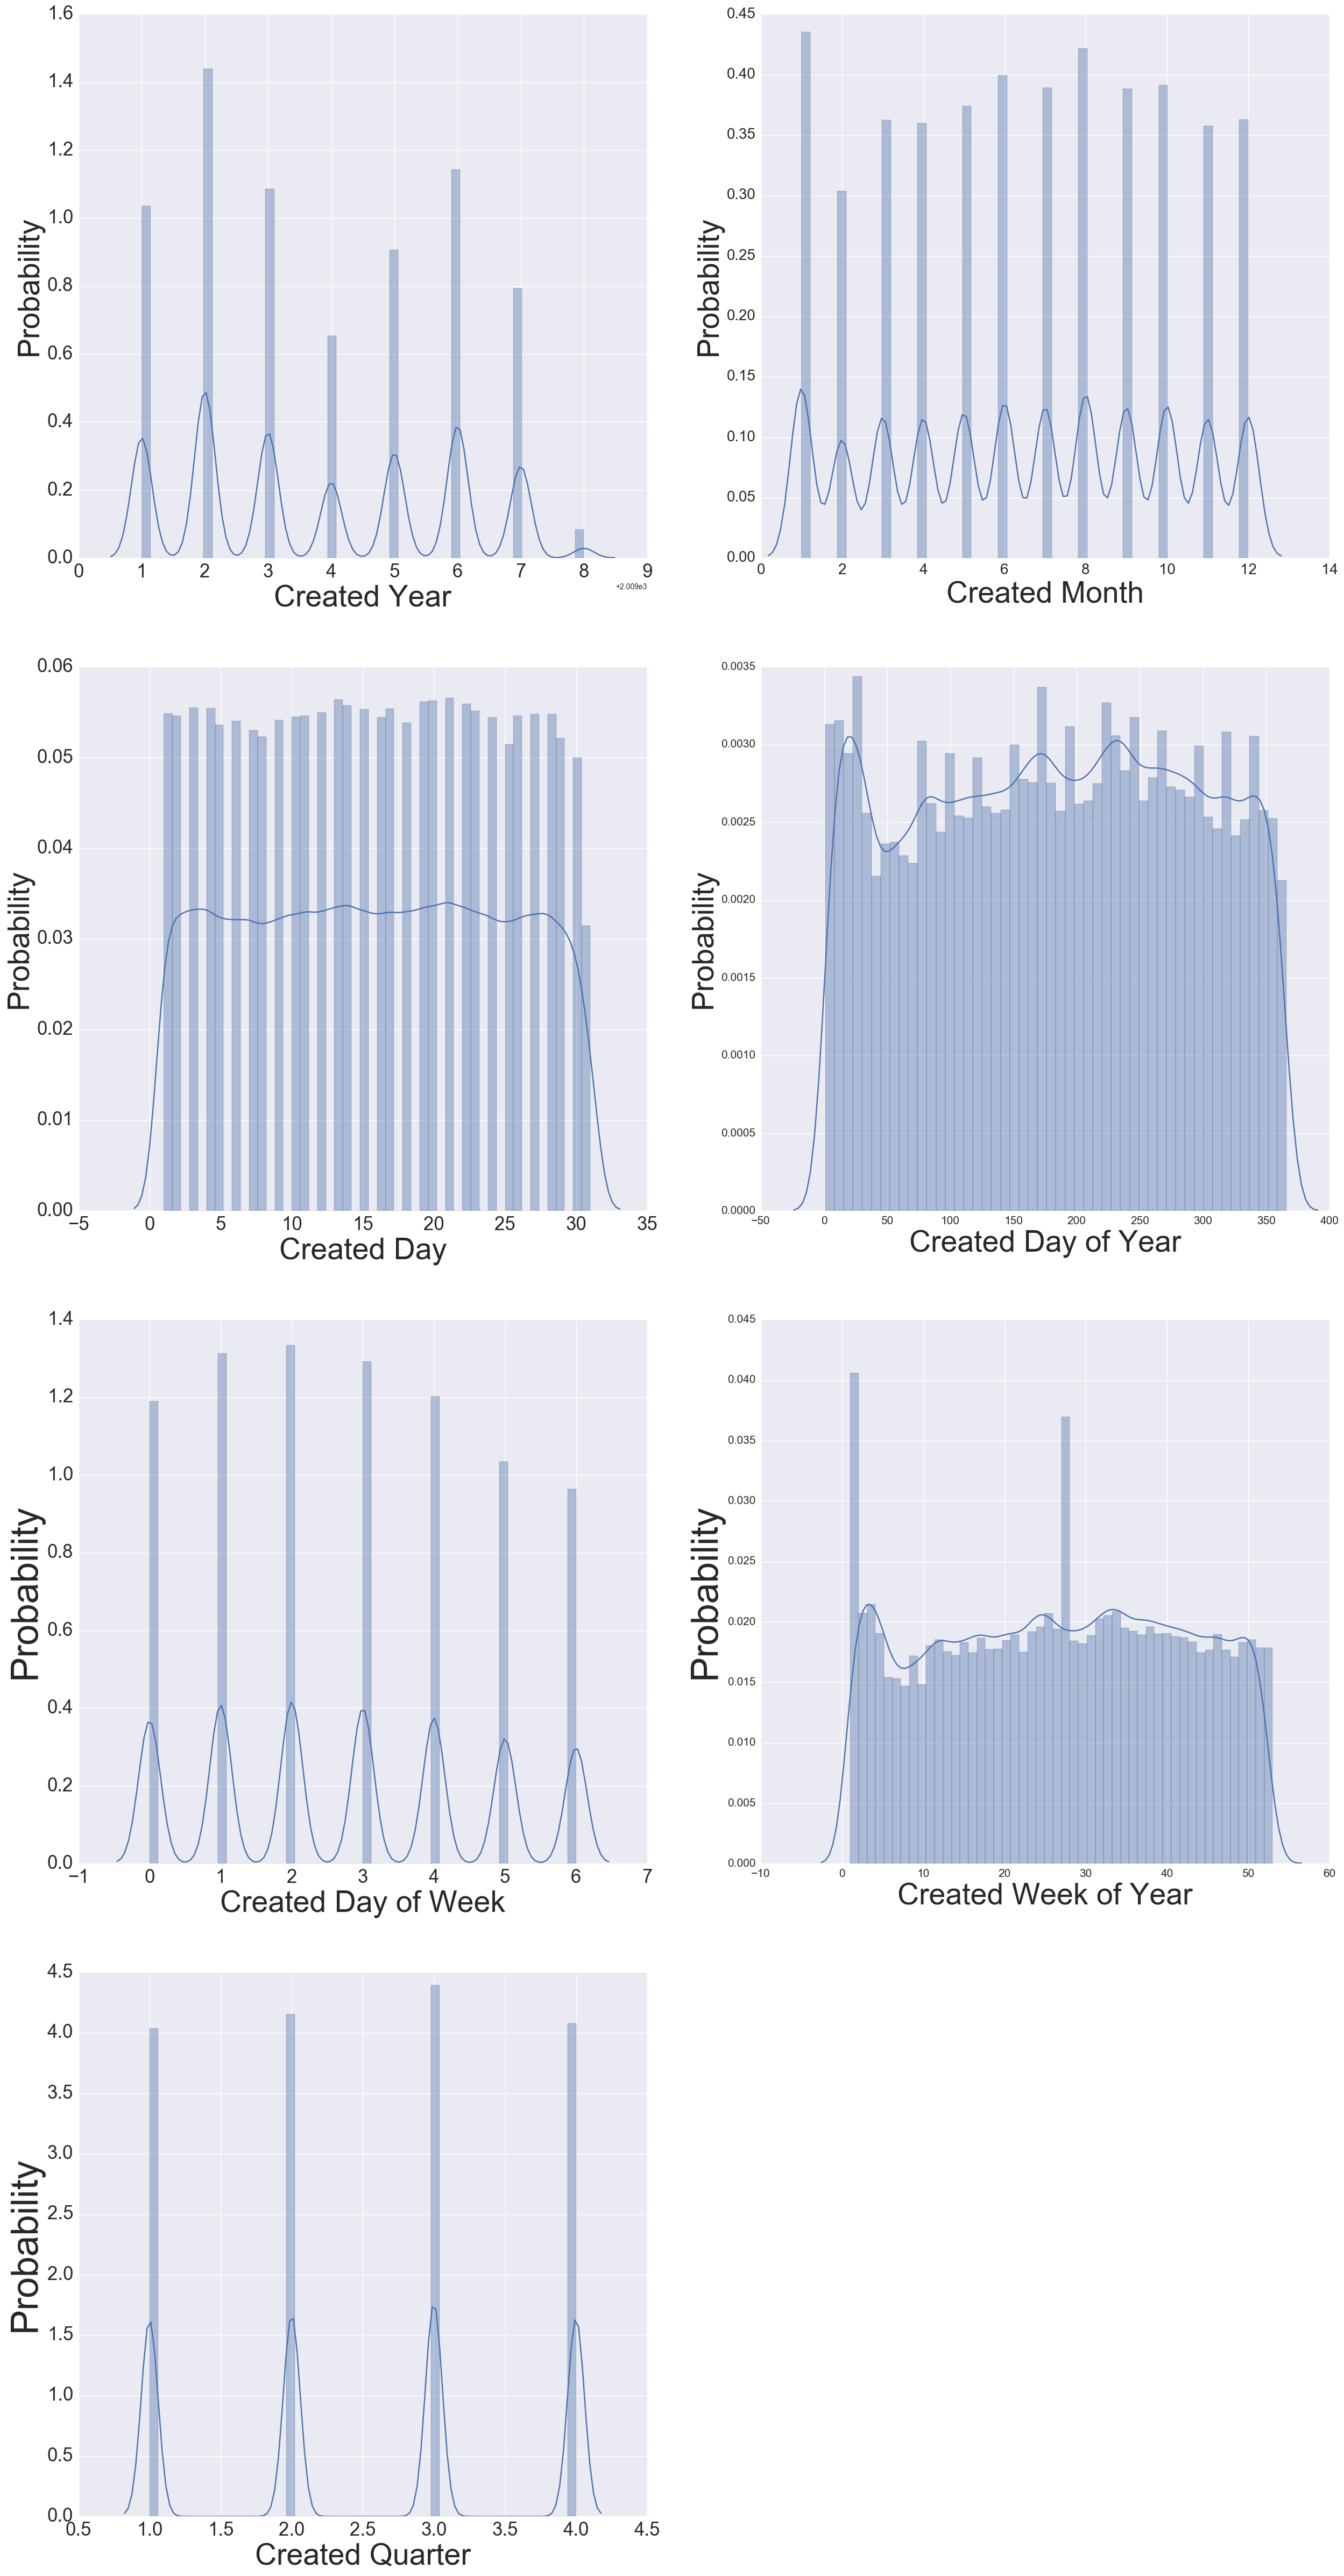

In [15]:
fig = plt.figure(dpi = 100, figsize = (30, 60))

ax1 = fig.add_subplot(4, 2, 1)
ax1.plot = sns.distplot(CreatedYear[~ np.isnan(CreatedYear)])
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("Created Year", fontsize = 40)
plt.ylabel("Probability", fontsize = 40)

ax2 = fig.add_subplot(4, 2, 2)
ax2.plot = sns.distplot(CreatedMonth[~ np.isnan(CreatedMonth)])
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Created Month", fontsize = 40)
plt.ylabel("Probability", fontsize = 40)

ax4 = fig.add_subplot(4, 2, 3)
ax4.plot = sns.distplot(CreatedDay[~ np.isnan(CreatedDay)])
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("Created Day", fontsize = 40)
plt.ylabel("Probability", fontsize = 40)

ax5 = fig.add_subplot(4, 2, 4)
ax5.plot = sns.distplot(CreatedDayofYear[~ np.isnan(CreatedDayofYear)])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Created Day of Year", fontsize = 40)
plt.ylabel("Probability", fontsize = 40)
                                     
ax3 = fig.add_subplot(4, 2, 5)
ax3.plot = sns.distplot(CreatedDayofWeek[~ np.isnan(CreatedDayofWeek)])
# sns.plt.xlim(1975, 2020)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("Created Day of Week", fontsize = 40)
plt.ylabel("Probability", fontsize = 50)
                                    
ax3 = fig.add_subplot(4, 2, 6)
ax3.plot = sns.distplot(CreatedWeekofYear[~ np.isnan(CreatedWeekofYear)])
# sns.plt.xlim(1975, 2020)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Created Week of Year", fontsize = 40)
plt.ylabel("Probability", fontsize = 50)

ax3 = fig.add_subplot(4, 2, 7)
ax3.plot = sns.distplot(CreatedQuarter[~ np.isnan(CreatedQuarter)])
# sns.plt.xlim(1975, 2020)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("Created Quarter", fontsize = 40)
plt.ylabel("Probability", fontsize = 50)

fig.show()

In [89]:
EventWeekofYear.value_counts()

2     9913
4     9472
34    9379
3     9174
33    9145
32    9095
25    9042
24    8715
23    8709
38    8693
26    8690
21    8687
35    8649
39    8643
37    8576
41    8570
36    8563
5     8560
46    8474
28    8462
1     8452
40    8376
42    8352
31    8339
17    8316
29    8304
20    8290
50    8259
12    8240
30    8223
43    8169
27    8132
49    8127
11    8125
45    8102
15    8076
13    8054
18    8021
19    7897
51    7895
48    7860
47    7843
16    7778
14    7775
44    7733
22    7634
9     7509
52    7127
6     6926
7     6837
10    6654
8     6495
53    1026
Name: EventDate, dtype: int64

In [16]:
# EventDate
EventDate = pd.to_datetime(stop_search['EventDate'])
EventYear = EventDate.dt.year
EventMonth = EventDate.dt.month
EventDay = EventDate.dt.day
EventDayofYear = EventDate.dt.dayofyear
EventDayofWeek = EventDate.dt.dayofweek
EventWeekofYear = EventDate.dt.weekofyear
EventQuarter = EventDate.dt.quarter
EventHour = EventDate.dt.hour
EventMinute = EventDate.dt.minute

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


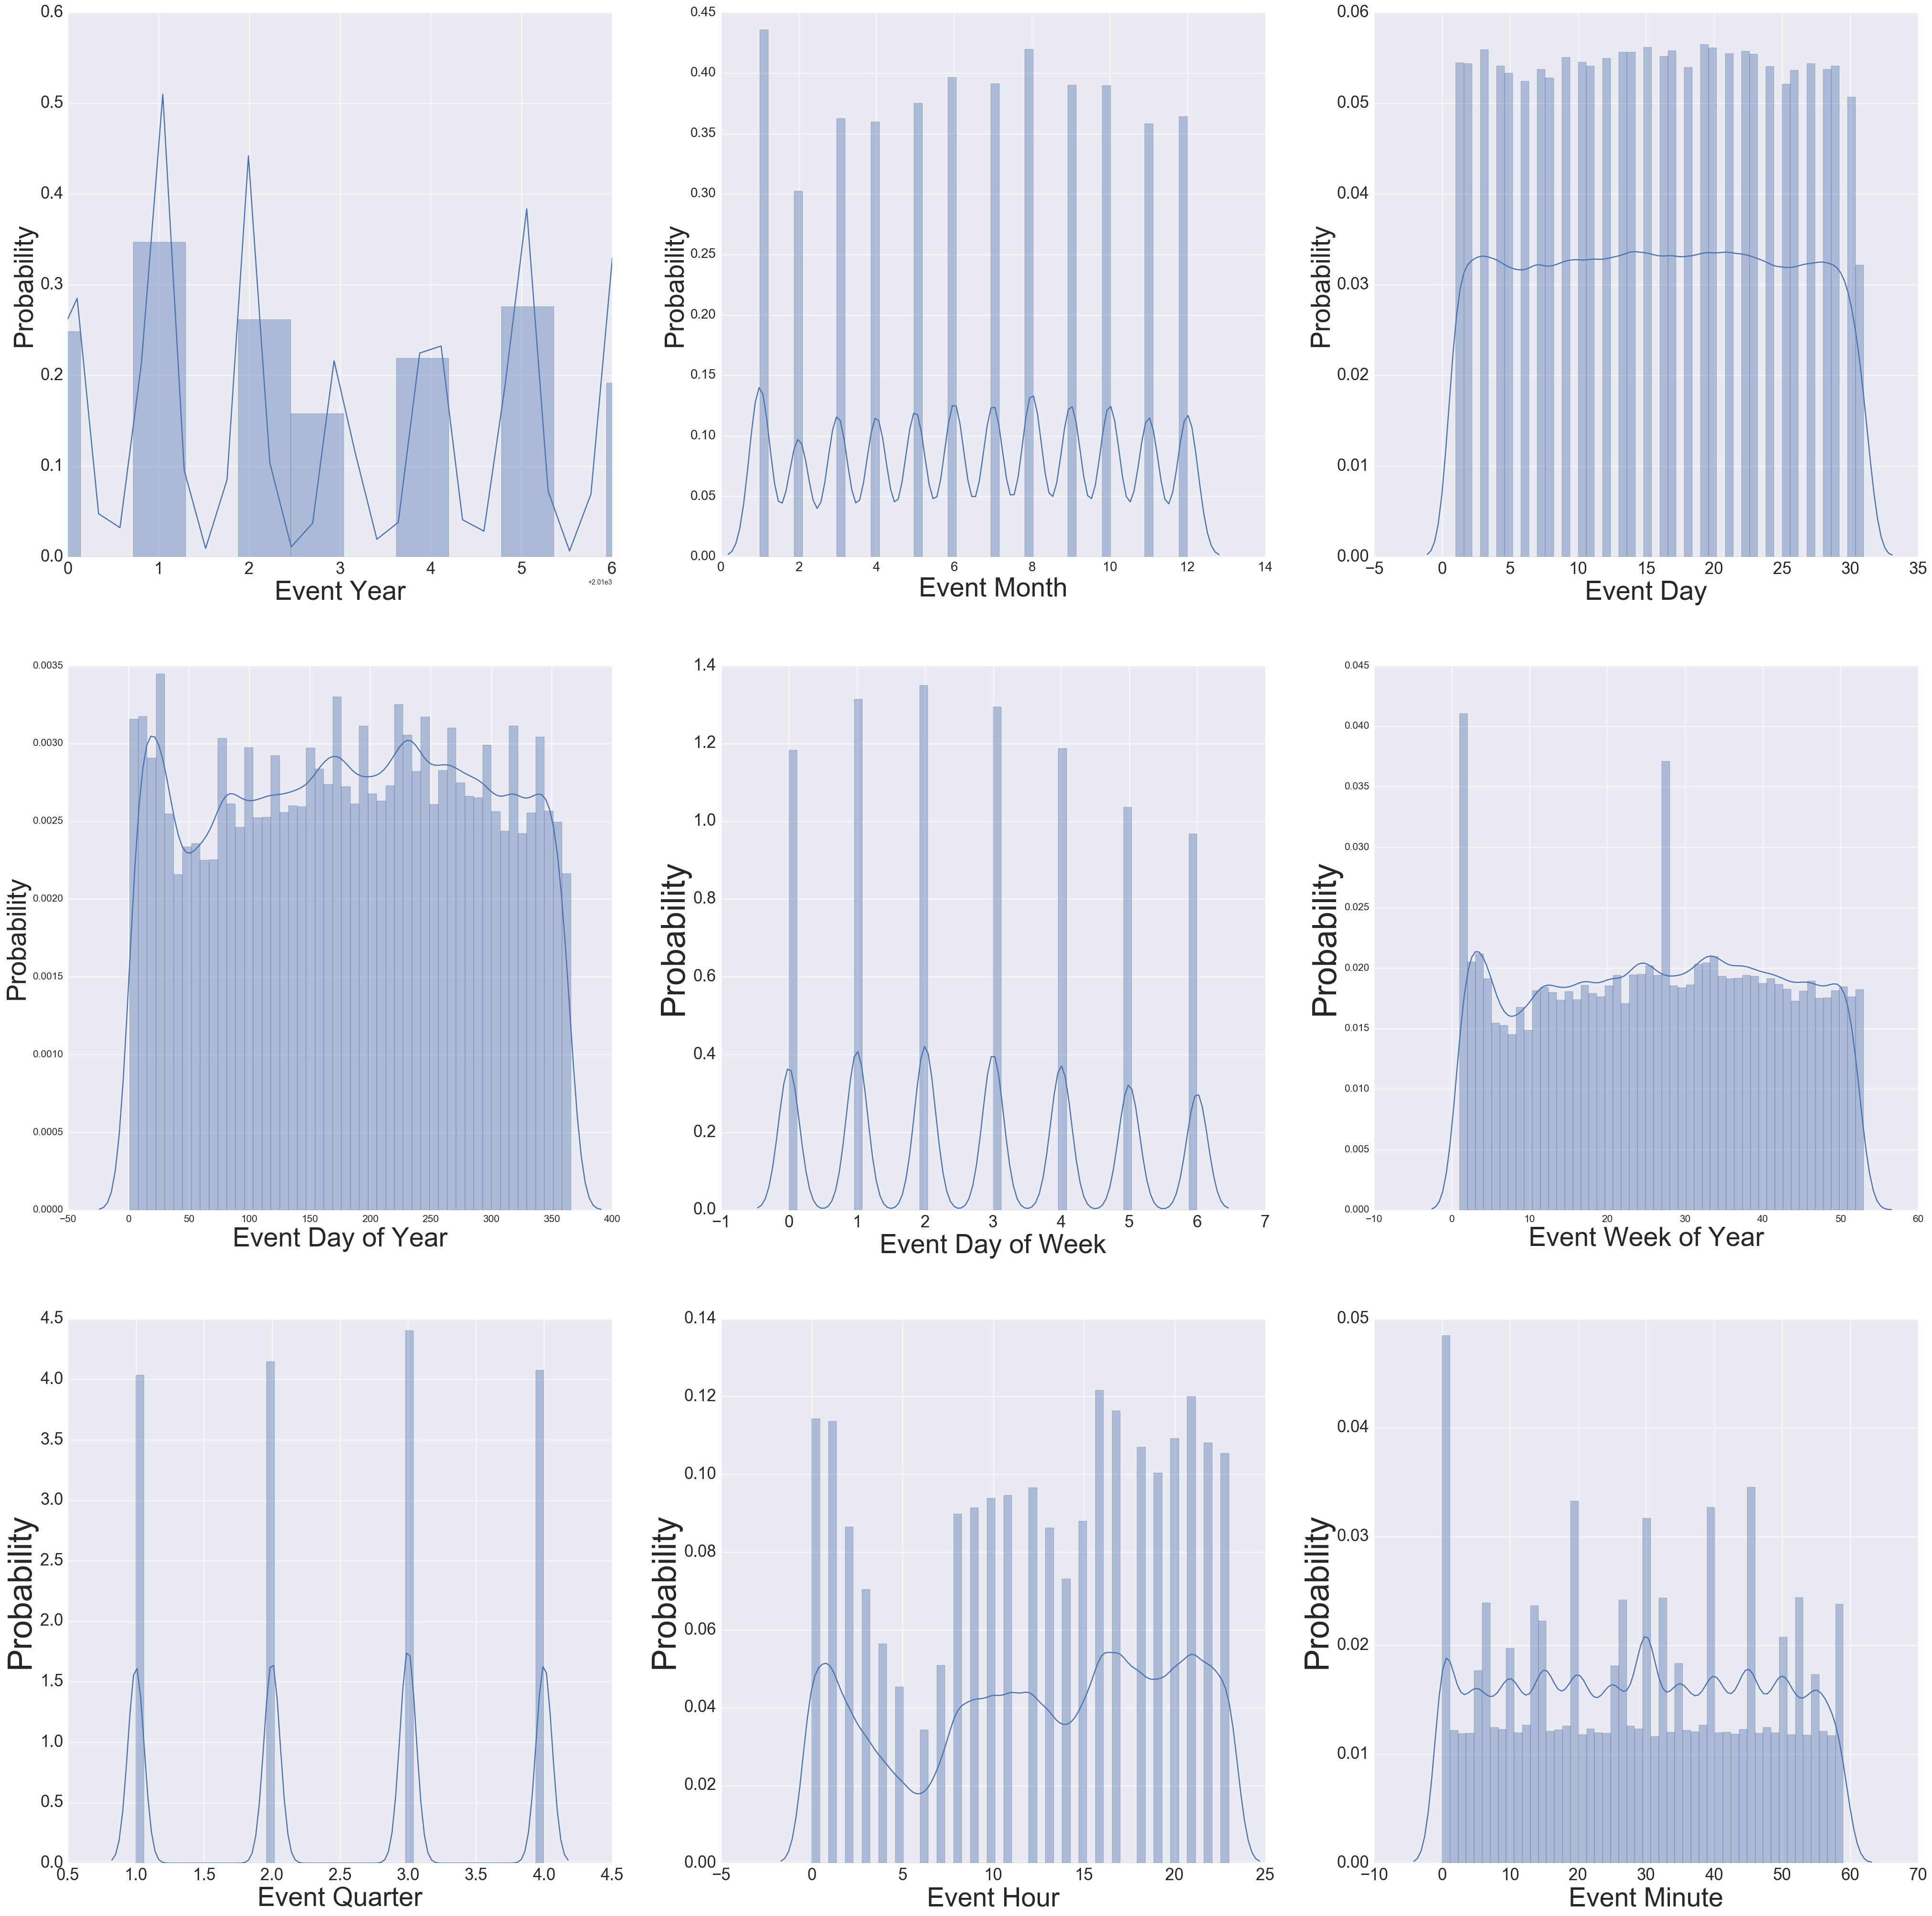

In [34]:
fig = plt.figure(dpi = 100, figsize = (50, 50))

ax1 = fig.add_subplot(3, 3, 1)
ax1.plot = sns.distplot(EventYear[~ np.isnan(EventYear)])
sns.plt.xlim(2010, 2016)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("Event Year", fontsize = 40)
plt.ylabel("Probability", fontsize = 40)

ax2 = fig.add_subplot(3, 3, 2)
ax2.plot = sns.distplot(EventMonth[~ np.isnan(EventMonth)])
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Event Month", fontsize = 40)
plt.ylabel("Probability", fontsize = 40)

ax3 = fig.add_subplot(3, 3, 3)
ax3.plot = sns.distplot(EventDay[~ np.isnan(EventDay)])
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("Event Day", fontsize = 40)
plt.ylabel("Probability", fontsize = 40)

ax4 = fig.add_subplot(3, 3, 4)
ax4.plot = sns.distplot(EventDayofYear[~ np.isnan(EventDayofYear)])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Event Day of Year", fontsize = 40)
plt.ylabel("Probability", fontsize = 40)
                                     
ax5 = fig.add_subplot(3, 3, 5)
ax5.plot = sns.distplot(EventDayofWeek[~ np.isnan(EventDayofWeek)])
# sns.plt.xlim(1975, 2020)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("Event Day of Week", fontsize = 40)
plt.ylabel("Probability", fontsize = 50)
                                    
ax6 = fig.add_subplot(3, 3, 6)
ax6.plot = sns.distplot(EventWeekofYear[~ np.isnan(EventWeekofYear)])
# sns.plt.xlim(1975, 2020)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Event Week of Year", fontsize = 40)
plt.ylabel("Probability", fontsize = 50)

ax7 = fig.add_subplot(3, 3, 7)
ax7.plot = sns.distplot(EventQuarter[~ np.isnan(EventQuarter)])
# sns.plt.xlim(1975, 2020)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("Event Quarter", fontsize = 40)
plt.ylabel("Probability", fontsize = 50)

ax8 = fig.add_subplot(3, 3, 8)
ax8.plot = sns.distplot(EventHour[~ np.isnan(EventHour)])
# sns.plt.xlim(1975, 2020)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("Event Hour", fontsize = 40)
plt.ylabel("Probability", fontsize = 50)

ax9 = fig.add_subplot(3, 3, 9)
ax9.plot = sns.distplot(EventMinute[~ np.isnan(EventMinute)])
# sns.plt.xlim(1975, 2020)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("Event Minute", fontsize = 40)
plt.ylabel("Probability", fontsize = 50)

fig.show()

(5) StopType - StopDescription

TRAFFIC VIOLATION         238448
CALL FOR SERVICE           60341
SUSPECT PERSON             57659
CRIMINAL VIOLATION         24970
OTHER                      21950
CITIZEN CONTACT            14184
SUSPECT VEHICLE             5144
FLAGGED DOWN                3789
JUVENILE VIOLATION          2970
PRESENT AT CRIME SCENE       702
Name: StopDescription, dtype: int64


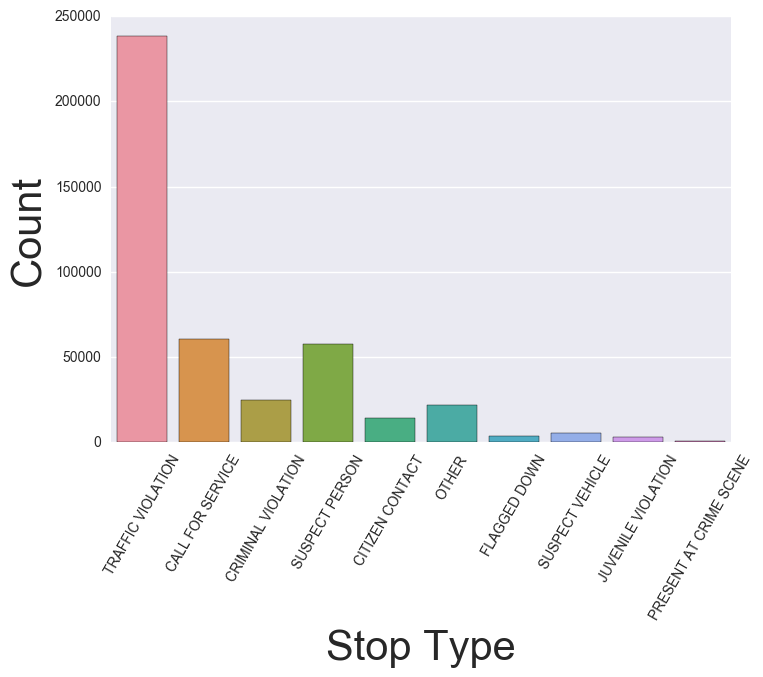

In [18]:
print(stop_search["StopDescription"].value_counts())

plot = sns.countplot(stop_search["StopDescription"])

for label in plot.get_xticklabels():
    label.set_rotation(60)

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Stop Type", fontsize = 30)
plt.ylabel("Count", fontsize = 30)

(6) Stop result - ActionsTaken

In [19]:
print(stop_search["ActionsTaken"].value_counts())

Stop Results: Citation issued;Subject Type: Driver;Search Occurred: No;Evidence Seized: No                                                                                                                                                                                                                                                                               11536
Stop Results: Citation issued;Subject Type: Driver                                                                                                                                                                                                                                                                                                                        9923
Stop Results: Verbal warning;Subject Type: Driver;Search Occurred: No;Evidence Seized: No                                                                                                                                                                                 

(7) Time series analysis - EventData

In [35]:
event_time = pd.DataFrame({'Year': EventYear, 
                           'Quarter': EventQuarter,
                           'Month': EventMonth,
                           'WeekofYear': EventWeekofYear,
                           'Day': EventDay,
                           'DayofYear': EventDayofYear,
                           'DayofWeek': EventDayofWeek,
                           'Hour': EventHour,
                           'Minute': EventMinute,
                           'Number': np.repeat(1, stop_search.shape[0])
                          }, index = None)

In [36]:
event_time.head()

Day  DayofWeek  DayofYear  Hour  Minute  Month  Number  Quarter  \
0    1          4          1     1      11      1       1        1   
1    1          4          1     2       6      1       1        1   
2    1          4          1     2       6      1       1        1   
3    1          4          1     2       6      1       1        1   
4    1          4          1     2       6      1       1        1   

   WeekofYear  Year  
0          53  2010  
1          53  2010  
2          53  2010  
3          53  2010  
4          53  2010

In [81]:
# aggregate data by year, month, day
ymd = pd.to_datetime(event_time.Year*10000 + event_time.Month*100 + event_time.Day, format='%Y%m%d')
ymd_data = pd.DataFrame({'Date': ymd, 
                         'Number': np.repeat(1, stop_search.shape[0])
                        }, index = None)
agg_ymd = ymd_data.groupby(['Date'])['Number'].sum()
index = agg_ymd.index
agg_ymd = pd.DataFrame({'Count': agg_ymd
                        # 'Date': index
                       }, index = None)
# agg_ymd.Date = pd.to_datetime(agg_ymd.Date)
agg_ymd.set_index(index)
print(ymd_data.shape)
print(ymd_data.head())
print(agg_ymd.shape)
print(agg_ymd.head())

(430157, 2)
        Date  Number
0 2010-01-01       1
1 2010-01-01       1
2 2010-01-01       1
3 2010-01-01       1
4 2010-01-01       1
(2739, 1)
            Count
Date             
1991-07-24      2
1999-11-03      3
1999-11-21      1
2001-03-03      1
2001-06-10      1


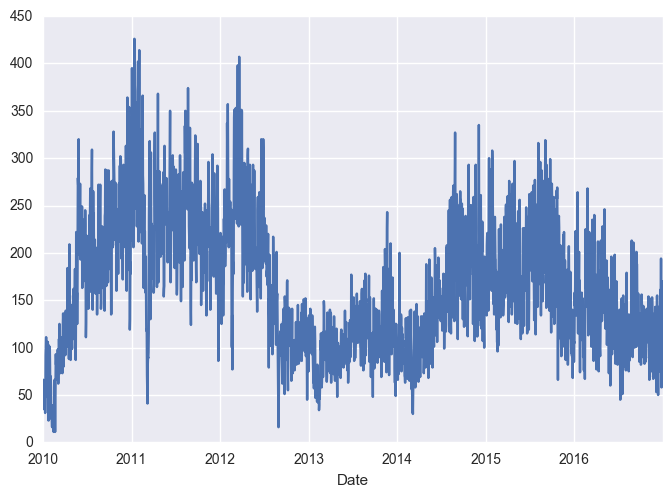

In [82]:
from pandas import Series
timeData = Series(agg_ymd.Count, index=index)
timeData['2010':'2016'].plot()

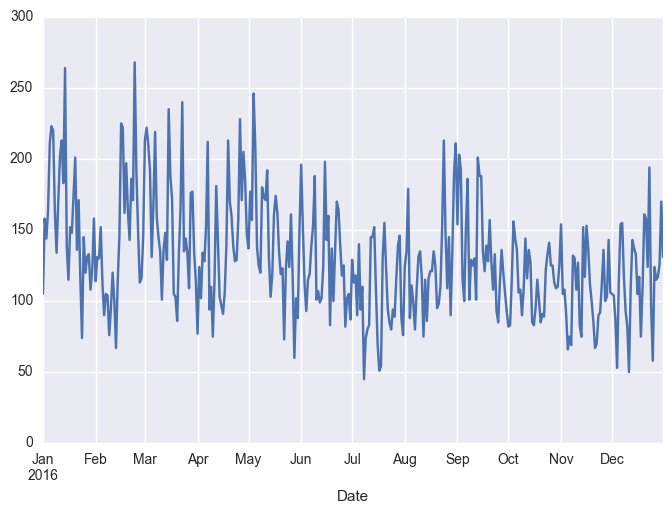

In [83]:
timeData['2016-01-01':'2016-12-31'].plot()

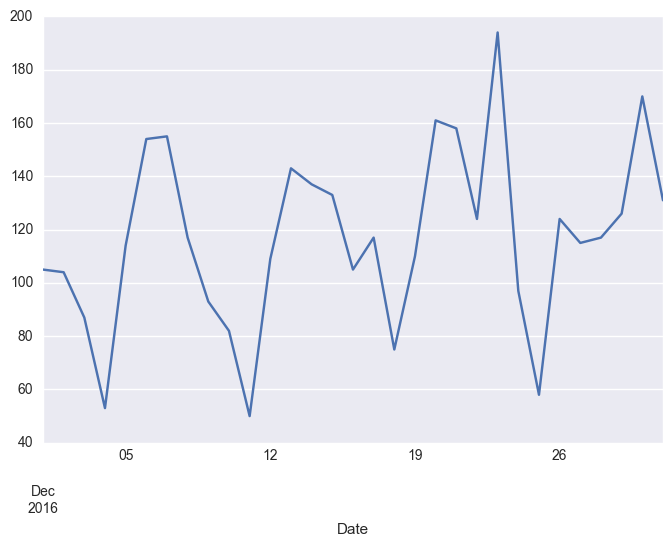

In [85]:
timeData['2016-12-01':'2016-12-31'].plot()

In [87]:
timeData[timeData > 400]

Date
2011-01-13    426
2011-01-14    405
2011-01-28    402
2011-02-02    414
2012-03-20    407
Name: Count, dtype: int32